# Python Essentials by Paul Chao #
## Python I/O Practices ##

## Image File  圖檔 ##

### Store File from Web 從網路上抓檔案儲存 ###

In [45]:
import requests

In [3]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary or bytes to be sent in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



In [3]:
import requests
resp = requests.get(url="https://www.nasa.gov/sites/default/files/thumbnails/image/pia21618b-16.jpg")

if resp.status_code == 200:
    with open("data.jpg", "wb") as f:
        f.write(resp.content)


### Open Image File 開啟圖檔 ###

In [6]:
from PIL import Image    # package pillow
with Image.open("data.jpg") as myimage:
    myimage.show()

### Whole Program 程式總集 ###
``` Python
import requests
from PIL import Image    # package pillow

resp = requests.get(url="https://www.nasa.gov/sites/default/files/thumbnails/image/pia21618b-16.jpg")

if resp.status_code == 200:
    with open("data.jpg", "wb") as f:
        f.write(resp.content)

with Image.open("data.jpg") as myimage:
    myimage.show()
```

### ZIP Format  ZIP檔案處理 - 自己做個解壓縮器 ###

[file sample](https://sheethub.com/data.gov.tw/政府資料開放平臺資料集清單/i/44/台灣電力股份有限公司)

In [71]:
abc = requests.get(url="http://data.taipower.com.tw/opendata/apply/file/d003001/001.zip")
if abc.status_code == 200:
    with open("twe-001.zip", "wb") as f:
        f.write(abc.content)

In [1]:
import zipfile

In [72]:
decompressed = zipfile.ZipFile('twe-001.zip','r')
decompressed

<zipfile.ZipFile filename='twe-001.zip' mode='r'>

In [4]:
dir(decompressed)

['NameToInfo',
 '_RealGetContents',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allowZip64',
 '_comment',
 '_didModify',
 '_extract_member',
 '_filePassed',
 '_fileRefCnt',
 '_fpclose',
 '_lock',
 '_open_to_write',
 '_sanitize_windows_name',
 '_seekable',
 '_windows_illegal_name_trans_table',
 '_write_end_record',
 '_writecheck',
 '_writing',
 'close',
 'comment',
 'compression',
 'debug',
 'extract',
 'extractall',
 'filelist',
 'filename',
 'fp',
 'getinfo',
 'infolist',
 'mode',
 'namelist',
 'open',
 'printdir',
 'pwd',
 'read',
 'setpassword',
 'start_dir',
 'testzip',
 'write',
 'writestr']

In [73]:
decompressed.printdir()

File Name                                             Modified             Size
╛·ª~Ñ¡ºí│µ╗∙.txt                               2017-05-03 13:15:16         4214
╛·ª~Ñ╬ñß╝╞.txt                                 2017-05-03 13:15:28         6004
╛·ª~ªµ╖~ºOí]Ñ╗└╔ñúªAº≤╖sí^.txt                 2017-05-03 13:15:42       296040


In [52]:
memberlist = decompressed.namelist()
memberlist

['╛·ª~Ñ¡ºí│µ╗∙.txt', '╛·ª~Ñ╬ñß╝╞.txt', '╛·ª~ªµ╖~ºOí]Ñ╗└╔ñúªAº≤╖sí^.txt']

In [53]:
decompressed.extract(path='./twe/', member=memberlist[1])

'twe\\╛·ª~Ñ╬ñß╝╞.txt'

In [74]:
for info in decompressed.infolist():
    print(info.filename)
    print('\tComment:\t', info.comment)
    print('\tSystem:\t\t', info.create_system, '(0 = Windows, 3 = Unix)')
    print('\tZIP version:\t', info.create_version)
    print('\tCompressed:\t', info.compress_size, 'bytes')
    print('\tUncompressed:\t', info.file_size, 'bytes')

╛·ª~Ñ¡ºí│µ╗∙.txt
	Comment:	 b''
	System:		 0 (0 = Windows, 3 = Unix)
	ZIP version:	 63
	Compressed:	 1139 bytes
	Uncompressed:	 4214 bytes
╛·ª~Ñ╬ñß╝╞.txt
	Comment:	 b''
	System:		 0 (0 = Windows, 3 = Unix)
	ZIP version:	 63
	Compressed:	 1863 bytes
	Uncompressed:	 6004 bytes
╛·ª~ªµ╖~ºOí]Ñ╗└╔ñúªAº≤╖sí^.txt
	Comment:	 b''
	System:		 0 (0 = Windows, 3 = Unix)
	ZIP version:	 63
	Compressed:	 48941 bytes
	Uncompressed:	 296040 bytes


The zipfile module does not support ZIP files with appended comments, or multi-disk ZIP files. It does support ZIP files larger than 4 GB that use the ZIP64 extensions.

### Whole Program 程式總集 ###
``` Python
import requests
import zipfile

abc = requests.get(url="http://data.taipower.com.tw/opendata/apply/file/d003001/001.zip")

if abc.status_code == 200:
    with open("twe-001.zip", "wb") as f:
        f.write(abc.content)
		
decompressed = zipfile.ZipFile('twe-001.zip','r')
memberlist = decompressed.namelist()

for i in memberlist:
	decompressed.extract(path='./twe/', member=i)
	
for info in decompressed.infolist():
    print(info.filename)
    print('\tComment:\t', info.comment)
    print('\tSystem:\t\t', info.create_system, '(0 = Windows, 3 = Unix)')
    print('\tZIP version:\t', info.create_version)
    print('\tCompressed:\t', info.compress_size, 'bytes')
    print('\tUncompressed:\t', info.file_size, 'bytes')
```

### Comma Separated Values ( CSV ) file  CSV的檔案處理 ###

[file sample](http://www.taipower.com.tw/content/announcement/ann01.aspx?BType=31)

### Handle CSV by Bare Hands 徒手征服CSV ###

#### Write Data to CSV  寫入CSV ####

In [6]:
alice = ['Alice', 100000, 'Engineer']
bob = ['Bob', 200000, 'Manager']
people = [alice, bob,]

with open("first.csv", "w") as csv:
    for person in people:
        for item in person:
            csv.write(str(item)+",")
        csv.write("\n")

with open("first.csv") as csv:
    content = csv.read()

print(content)

Alice,100000,Engineer,
Bob,200000,Manager,



#### Read Data from CSV  取用CSV ####

In [9]:
with open("first.csv") as csv:
    content =  csv.read()

people = content.split('\n')
people

['Alice,100000,Engineer,', 'Bob,200000,Manager,', '']

In [11]:
person = people[0].split(',')
person

['Alice', '100000', 'Engineer', '']

In [12]:
# read sample  取用實例
with open("first.csv") as csv:
    content =  csv.read()

for person in content.split('\n'):
    for item in person.split(','):
        print(item, end="\n")

Alice
100000
Engineer

Bob
200000
Manager




### Use Built-in CSV Package  使用系統內建CSV套件 ###

In [13]:
import csv
help(csv)

Help on module csv:

NAME
    csv - CSV parsing and writing.

DESCRIPTION
    This module provides classes that assist in the reading and writing
    of Comma Separated Value (CSV) files, and implements the interface
    described by PEP 305.  Although many CSV files are simple to parse,
    the format is not formally defined by a stable specification and
    is subtle enough that parsing lines of a CSV file with something
    like line.split(",") is bound to fail.  The module supports three
    basic APIs: reading, writing, and registration of dialects.
    
    
    DIALECT REGISTRATION:
    
    Readers and writers support a dialect argument, which is a convenient
    handle on a group of settings.  When the dialect argument is a string,
    it identifies one of the dialects previously registered with the module.
    If it is a class or instance, the attributes of the argument are used as
    the settings for the reader or writer:
    
        class excel:
            delimiter = ',

#### To Read CSV by built-in csv package  內建套件的csv讀檔 ####

In [16]:
import csv

with open("first.csv") as file:
    content = csv.reader(file)  #a row will return
    print("content = ", content)
    for person in content:
        print("person = ", person)

content =  <_csv.reader object at 0x0000014C6DD9C528>
person =  ['Alice', '100000', 'Engineer', '']
person =  ['Bob', '200000', 'Manager', '']


#### To write CSV by built-in csv package 內建套件的csv寫檔 ####

In [28]:
import csv
people = [['Alice', '100000', 'Engineer',], ['Bob', '200000', 'Manager'],]

with open("second.csv", "w", newline="") as file:
    content = csv.writer(file, delimiter=',')
    # write field names
    content.writerow(['name','salary','title'])
    for person in people:
        content.writerow(person)

#### Coverting Dictionary to CSV   對dictionary 做轉換 ####

In [29]:
import csv

with open("second.csv") as file:
    content = csv.DictReader(file)
    for person in content:
        print("name={}, salary={}, title={}".format(person["name"], person["salary"], person["title"]))

name=Alice, salary=100000, title=Engineer
name=Bob, salary=200000, title=Manager


In [30]:
print(person)

OrderedDict([('name', 'Bob'), ('salary', '200000'), ('title', 'Manager')])


In [45]:
import csv
people = [{'name':'Alice', 
               'salary': 100000, 
               'title':'Engineer'
          }, 
          {'name':'Bob', 
               'salary': 200000, 
               'title':'Manager'
          }
         ]

with open("third.csv", "w", newline="") as file:
    field_names = ['name','salary','title']
    content = csv.DictWriter(file, fieldnames = field_names)

    content.writeheader()
    for person in people:
        content.writerow(person)

## Assignments 小練習 ##
### 預備 : 試試看從 google 匯出您的通訊錄。
1. 登入 Gmail帳戶。
2. 在Gmail頁面下拉式選單點選[通訊錄]選項。
3. 選擇要匯出的項目，在[更多]中點選[匯出]。
4. 選擇你想要匯出的檔案格式，選擇Google CSV格式
   - 可以讓你方便地於Gmail帳戶間進行資料移轉，這也是備份通訊錄資料最適合的格式。
   - Outlook CSV則可讓你下載聯絡人資料後再匯入Outlook、Yahoo、Hotmail等其他收信程式。
   - vCard格式則供你匯入Apple Address Book之用。
5. 點選[匯出]。
6. 將檔案存至您的Python專案目錄 (記得確定檔名存為 **google.csv**)

樣本: https://goo.gl/ymqroJ  (記得確定檔名存為 **google.csv**)

### 練習 : 請試著讀入 csv 並且將值列印出來 ###

先不要看答案喔，試著做做看... 可運用上面的範例程式碼來更改。


In [3]:
import csv

with open("google.csv") as file:
    content = csv.DictReader(file)
    for person in content:
        print("Name={}, \tFamily Name={}, \ttitle={}, \tBirthDay={}".format(person["Name"], person["Family Name"], person["Occupation"],person["Birthday"]))

Name=Alice, 	Family Name=Chen, 	title=Manager, 	BirthDay=1997-01-01
Name=Bob, 	Family Name=Chang, 	title=Engineer, 	BirthDay=1997-01-02
Name=Charles, 	Family Name=Chong, 	title=Engineer, 	BirthDay=1997-01-03
Name=Daisy, 	Family Name=Wang, 	title=Senior Engineer, 	BirthDay=1997-01-04
Name=Ellie, 	Family Name=Lai, 	title=Manager, 	BirthDay=1997-01-05
Name=Fanny, 	Family Name=Wang, 	title=CEO, 	BirthDay=1997-01-06
Name=Ginny, 	Family Name=Hung, 	title=Engineer, 	BirthDay=1997-01-07
Name=Howard, 	Family Name=Yo, 	title=Engineer, 	BirthDay=1997-01-08
Name=Ian, 	Family Name=Cheng, 	title=Senior Engineer, 	BirthDay=1997-01-09
Name=Jacky, 	Family Name=Wu, 	title=Engineer, 	BirthDay=1997-01-10
Name=King, 	Family Name=Chang, 	title=VP, 	BirthDay=1997-01-11
Name=Lilly, 	Family Name=Ko, 	title=PA, 	BirthDay=1997-01-12
Name=Morris, 	Family Name=Chang, 	title=Engineer, 	BirthDay=1997-01-13
Name=Nancy, 	Family Name=Wu, 	title=Engineer, 	BirthDay=1997-01-14
Name=Oliver, 	Family Name=Lee, 	title=Engine

### Can be More Handy : Use Pandas  還可以更方便一點 : 使用 Pandas 套件 ###

In [5]:
import pandas as pd
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic and

In [6]:
df = pd.read_csv("google.csv")

In [7]:
df

,Name,Given Name,Additional Name,Family Name,Yomi Name,Given Name Yomi,Additional Name Yomi,Family Name Yomi,Name Prefix,Name Suffix,...,Organization 1 - Yomi Name,Organization 1 - Title,Organization 1 - Department,Organization 1 - Symbol,Organization 1 - Location,Organization 1 - Job Description,Website 1 - Type,Website 1 - Value,Event 1 - Type,Event 1 - Value
0,Alice,Ali,NaN,Chen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bob,Bobo,NaN,Chang,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Charles,Charli,NaN,Chong,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daisy,NaN,NaN,Wang,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ellie,Eli,NaN,Lai,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fanny,NaN,NaN,Wang,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ginny,NaN,NaN,Hung,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Howard,How,NaN,Yo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ian,NaN,NaN,Cheng,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Jacky,Jack,NaN,Wu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 66 columns):
Name                                26 non-null object
Given Name                          13 non-null object
Additional Name                     0 non-null float64
Family Name                         26 non-null object
Yomi Name                           0 non-null float64
Given Name Yomi                     0 non-null float64
Additional Name Yomi                0 non-null float64
Family Name Yomi                    0 non-null float64
Name Prefix                         0 non-null float64
Name Suffix                         0 non-null float64
Initials                            0 non-null float64
Nickname                            0 non-null float64
Short Name                          0 non-null float64
Maiden Name                         0 non-null float64
Birthday                            26 non-null object
Gender                              0 non-null float64
Location         

In [9]:
df.head(5)

,Name,Given Name,Additional Name,Family Name,Yomi Name,Given Name Yomi,Additional Name Yomi,Family Name Yomi,Name Prefix,Name Suffix,...,Organization 1 - Yomi Name,Organization 1 - Title,Organization 1 - Department,Organization 1 - Symbol,Organization 1 - Location,Organization 1 - Job Description,Website 1 - Type,Website 1 - Value,Event 1 - Type,Event 1 - Value
0,Alice,Ali,NaN,Chen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bob,Bobo,NaN,Chang,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Charles,Charli,NaN,Chong,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daisy,NaN,NaN,Wang,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ellie,Eli,NaN,Lai,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
new_df = df.loc[1:10,['Name', 'Family Name', 'Birthday','Occupation']]
new_df

,Name,Family Name,Birthday,Occupation
1,Bob,Chang,1997-01-02,Engineer
2,Charles,Chong,1997-01-03,Engineer
3,Daisy,Wang,1997-01-04,Senior Engineer
4,Ellie,Lai,1997-01-05,Manager
5,Fanny,Wang,1997-01-06,CEO
6,Ginny,Hung,1997-01-07,Engineer
7,Howard,Yo,1997-01-08,Engineer
8,Ian,Cheng,1997-01-09,Senior Engineer
9,Jacky,Wu,1997-01-10,Engineer
10,King,Chang,1997-01-11,VP


In [16]:
new_df[new_df['Occupation']=='Engineer']

,Name,Family Name,Birthday,Occupation
1,Bob,Chang,1997-01-02,Engineer
2,Charles,Chong,1997-01-03,Engineer
6,Ginny,Hung,1997-01-07,Engineer
7,Howard,Yo,1997-01-08,Engineer
9,Jacky,Wu,1997-01-10,Engineer


### CSV converted by pandas to dict /   CSV 經由 pandas 轉成 dict ###

In [59]:
new_df[new_df['Occupation']=='Engineer'].to_dict()

{'Birthday': {1: '1997-01-02',
  2: '1997-01-03',
  6: '1997-01-07',
  7: '1997-01-08',
  9: '1997-01-10'},
 'Family Name': {1: 'Chang', 2: 'Chong', 6: 'Hung', 7: 'Yo', 9: 'Wu'},
 'Name': {1: 'Bob', 2: 'Charles', 6: 'Ginny', 7: 'Howard', 9: 'Jacky'},
 'Occupation': {1: 'Engineer',
  2: 'Engineer',
  6: 'Engineer',
  7: 'Engineer',
  9: 'Engineer'}}

In [60]:
new_df[new_df['Occupation']=='Engineer'].set_index('Name').T.to_dict()

{'Bob': {'Birthday': '1997-01-02',
  'Family Name': 'Chang',
  'Occupation': 'Engineer'},
 'Charles': {'Birthday': '1997-01-03',
  'Family Name': 'Chong',
  'Occupation': 'Engineer'},
 'Ginny': {'Birthday': '1997-01-07',
  'Family Name': 'Hung',
  'Occupation': 'Engineer'},
 'Howard': {'Birthday': '1997-01-08',
  'Family Name': 'Yo',
  'Occupation': 'Engineer'},
 'Jacky': {'Birthday': '1997-01-10',
  'Family Name': 'Wu',
  'Occupation': 'Engineer'}}

### Note : 分解動作 ###

In [61]:
new_df[new_df['Occupation']=='Engineer'].set_index('Name')

,Family Name,Birthday,Occupation
Name,,,
Bob,Chang,1997-01-02,Engineer
Charles,Chong,1997-01-03,Engineer
Ginny,Hung,1997-01-07,Engineer
Howard,Yo,1997-01-08,Engineer
Jacky,Wu,1997-01-10,Engineer


In [62]:
new_df[new_df['Occupation']=='Engineer'].set_index('Name').to_dict()

{'Birthday': {'Bob': '1997-01-02',
  'Charles': '1997-01-03',
  'Ginny': '1997-01-07',
  'Howard': '1997-01-08',
  'Jacky': '1997-01-10'},
 'Family Name': {'Bob': 'Chang',
  'Charles': 'Chong',
  'Ginny': 'Hung',
  'Howard': 'Yo',
  'Jacky': 'Wu'},
 'Occupation': {'Bob': 'Engineer',
  'Charles': 'Engineer',
  'Ginny': 'Engineer',
  'Howard': 'Engineer',
  'Jacky': 'Engineer'}}

In [63]:
new_df[new_df['Occupation']=='Engineer'].set_index('Name').T

Name,Bob,Charles,Ginny,Howard,Jacky
Family Name,Chang,Chong,Hung,Yo,Wu
Birthday,1997-01-02,1997-01-03,1997-01-07,1997-01-08,1997-01-10
Occupation,Engineer,Engineer,Engineer,Engineer,Engineer


In [64]:
new_df[new_df['Occupation']=='Engineer'].set_index('Name').T.to_dict()

{'Bob': {'Birthday': '1997-01-02',
  'Family Name': 'Chang',
  'Occupation': 'Engineer'},
 'Charles': {'Birthday': '1997-01-03',
  'Family Name': 'Chong',
  'Occupation': 'Engineer'},
 'Ginny': {'Birthday': '1997-01-07',
  'Family Name': 'Hung',
  'Occupation': 'Engineer'},
 'Howard': {'Birthday': '1997-01-08',
  'Family Name': 'Yo',
  'Occupation': 'Engineer'},
 'Jacky': {'Birthday': '1997-01-10',
  'Family Name': 'Wu',
  'Occupation': 'Engineer'}}

### Whole Program 程式總集 ###
``` Python
# encoding=utf-8
import pandas as pd

title = input('Input Occupation:')

df = pd.read_csv("google.csv")
new_df = df.loc[1:10,['Name', 'Family Name', 'Birthday','Occupation']]
final_dict = new_df[new_df['Occupation']==title].set_index('Name').T.to_dict()

print("dict = ", final_dict)
print("\n")

for name in final_dict.keys():
    person = final_dict[name]
    print("{} : {} {}, born {}".format(person['Occupation'], name, person['Family Name'], person['Birthday']))
```

### Result  / 執行結果 ###

In [70]:
import pandas as pd

title = input('Input Occupation:')

df = pd.read_csv("google.csv")
new_df = df.loc[1:10,['Name', 'Family Name', 'Birthday','Occupation']]
final_dict = new_df[new_df['Occupation']==title].set_index('Name').T.to_dict()

print("dict = ", final_dict)
print("\n")

for name in final_dict.keys():
    person = final_dict[name]
    print("{} : {} {}, born {}".format(person['Occupation'], name, person['Family Name'], person['Birthday']))

Input Occupation:Engineer
dict =  {'Bob': {'Family Name': 'Chang', 'Birthday': '1997-01-02', 'Occupation': 'Engineer'}, 'Charles': {'Family Name': 'Chong', 'Birthday': '1997-01-03', 'Occupation': 'Engineer'}, 'Ginny': {'Family Name': 'Hung', 'Birthday': '1997-01-07', 'Occupation': 'Engineer'}, 'Howard': {'Family Name': 'Yo', 'Birthday': '1997-01-08', 'Occupation': 'Engineer'}, 'Jacky': {'Family Name': 'Wu', 'Birthday': '1997-01-10', 'Occupation': 'Engineer'}}


Engineer : Bob Chang, born 1997-01-02
Engineer : Charles Chong, born 1997-01-03
Engineer : Ginny Hung, born 1997-01-07
Engineer : Howard Yo, born 1997-01-08
Engineer : Jacky Wu, born 1997-01-10


#### Convert to Excel Format  轉換成 Excel 格式 ####

In [71]:
content = pd.ExcelWriter('pd_first.xlsx')
df.to_excel(content, '廣宣學堂')
content.save()

#### Convert to Excel Format 轉換成 HTML 格式 ####

In [79]:
html_content = df.head(5).to_html()
html_content

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Name</th>\n      <th>Given Name</th>\n      <th>Additional Name</th>\n      <th>Family Name</th>\n      <th>Yomi Name</th>\n      <th>Given Name Yomi</th>\n      <th>Additional Name Yomi</th>\n      <th>Family Name Yomi</th>\n      <th>Name Prefix</th>\n      <th>Name Suffix</th>\n      <th>Initials</th>\n      <th>Nickname</th>\n      <th>Short Name</th>\n      <th>Maiden Name</th>\n      <th>Birthday</th>\n      <th>Gender</th>\n      <th>Location</th>\n      <th>Billing Information</th>\n      <th>Directory Server</th>\n      <th>Mileage</th>\n      <th>Occupation</th>\n      <th>Hobby</th>\n      <th>Sensitivity</th>\n      <th>Priority</th>\n      <th>Subject</th>\n      <th>Notes</th>\n      <th>Group Membership</th>\n      <th>E-mail 1 - Type</th>\n      <th>E-mail 1 - Value</th>\n      <th>E-mail 2 - Type</th>\n      <th>E-mail 2 - Value</th>\n      <th>E-mail 3 - T

In [81]:
from IPython.display import display, HTML
display(HTML(html_content))

,Name,Given Name,Additional Name,Family Name,Yomi Name,Given Name Yomi,Additional Name Yomi,Family Name Yomi,Name Prefix,Name Suffix,Initials,Nickname,Short Name,Maiden Name,Birthday,Gender,Location,Billing Information,Directory Server,Mileage,Occupation,Hobby,Sensitivity,Priority,Subject,Notes,Group Membership,E-mail 1 - Type,E-mail 1 - Value,E-mail 2 - Type,E-mail 2 - Value,E-mail 3 - Type,E-mail 3 - Value,Phone 1 - Type,Phone 1 - Value,Phone 2 - Type,Phone 2 - Value,Phone 3 - Type,Phone 3 - Value,Phone 4 - Type,Phone 4 - Value,Phone 5 - Type,Phone 5 - Value,Phone 6 - Type,Phone 6 - Value,Address 1 - Type,Address 1 - Formatted,Address 1 - Street,Address 1 - City,Address 1 - PO Box,Address 1 - Region,Address 1 - Postal Code,Address 1 - Country,Address 1 - Extended Address,Organization 1 - Type,Organization 1 - Name,Organization 1 - Yomi Name,Organization 1 - Title,Organization 1 - Department,Organization 1 - Symbol,Organization 1 - Location,Organization 1 - Job Description,Website 1 - Type,Website 1 - Value,Event 1 - Type,Event 1 - Value
0,Alice,Ali,NaN,Chen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01,NaN,NaN,NaN,NaN,NaN,Manager,NaN,NaN,NaN,NaN,NaN,* My Contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bob,Bobo,NaN,Chang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-02,NaN,NaN,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,NaN,NaN,* My Contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Charles,Charli,NaN,Chong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-03,NaN,NaN,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,NaN,NaN,* My Contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daisy,NaN,NaN,Wang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-04,NaN,NaN,NaN,NaN,NaN,Senior Engineer,NaN,NaN,NaN,NaN,NaN,* My Contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ellie,Eli,NaN,Lai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-05,NaN,NaN,NaN,NaN,NaN,Manager,NaN,NaN,NaN,NaN,NaN,* My Contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Word/文字 轉換 ##
### Converting Word Format to Text  將Word 格式轉為純文字 ###

In [1]:
!pip install python-docx

  Running setup.py bdist_wheel for python-docx: started
  Running setup.py bdist_wheel for python-docx: finished with status 'done'
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\cc\74\10\42b00d7d6a64cf21f194bfef9b94150009ada880f13c5b2ad3
Successfully built python-docx


In [7]:
import docx

doc = docx.Document("hello.docx")
print(doc.paragraphs)

[<docx.text.paragraph.Paragraph object at 0x000001E9BA697DD8>, <docx.text.paragraph.Paragraph object at 0x000001E9BA683DA0>]


In [9]:
doc.paragraphs[0].text

'Hello World:'

In [15]:
content_list = []
for para in doc.paragraphs:
    content_list.append(para.text)
print(content_list)
print('\n'.join(content_list))

['Hello World:', '\tHello WORD!']
Hello World:
	Hello WORD!


In [16]:
# complete code for read text from Word 完整從 Word 萃取純文字的代碼
import docx

doc = docx.Document("hello.docx")
content_list = []

for para in doc.paragraphs:
    content_list.append(para.text)

content = "\n".join(content_list)
print(content)

Hello World:
	Hello WORD!


**Note of 'join' : **

In [18]:
abc = ['hello','my','world']
print("-".join(abc))

hello-my-world


### Converting Text to Word Format  將純文字轉為Word 格式 ###

In [19]:
import docx

doc = docx.Document()
doc.add_paragraph('Hello world from text!')
doc.save('hello2.docx')

### Adding Styles  加點文字風格 ###

In [24]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('廣宣學堂', 0)

p = document.add_paragraph('第一個段落 ')
p.add_run('粗體字').bold = True
p.add_run(' 正常字 ')
p.add_run('斜體字').italic = True

document.add_heading('標題, 一', level=1)
document.add_paragraph('內容', style='Intense Quote')

document.add_paragraph(
    '沒有編號的項目1', style='ListBullet'
)
document.add_paragraph(
    '沒有編號的項目2', style='ListBullet'
)

document.add_paragraph(
    '有編號的項目', style='ListNumber'
)
document.add_paragraph(
    '有編號的項目', style='ListNumber'
)

document.add_picture('你的圖檔.png', width=Inches(1.25))

# 來點表格
table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = '欄位一'
hdr_cells[1].text = '欄位二'
hdr_cells[2].text = '欄位三'
table_content = [('內容1-1','內容1-2','內容1-3'), ('內容2-1','內容2-2','內容2-3'), ('內容3-1','內容3-2','內容3-3')]
for item in table_content:
    row_cells = table.add_row().cells
    row_cells[0].text = item[0]
    row_cells[1].text = item[1]
    row_cells[2].text = item[2]

document.add_page_break()

document.save('hello-style.docx')

C:\Users\User\Anaconda3\lib\site-packages\docx\styles\styles.py:54: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  warn(msg, UserWarning)


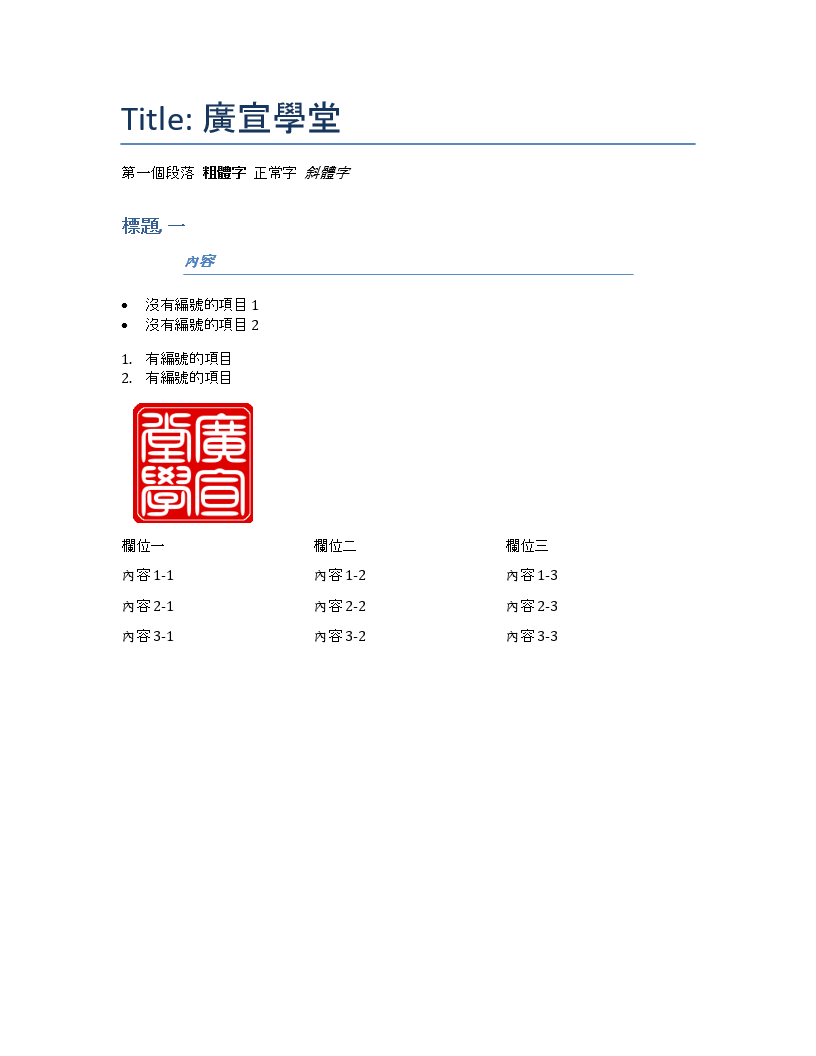

In [31]:
from IPython.display import Image 
Image(filename='hello-style.png')

細節可參考 python-docx 官方網頁: [https://python-docx.readthedocs.io](https://python-docx.readthedocs.io)

## Advanced : Something More ##

### XLSX (Microsoft Excel Open XML)   xlsx 檔案處理 ###

In [54]:
df = pd.read_excel("data.xls", sheetname="Data")
df.head()

,"Stock Market Data Used in ""Irrational Exuberance"" Princeton University Press, 2000, 2005, 2015, updated",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Cyclically,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Robert J. Shiller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adjusted,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Price,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Consumer,NaN,NaN,NaN,NaN,NaN,Earnings,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,S&P,NaN,NaN,Price,NaN,Long,NaN,NaN,NaN,Ratio,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Comp.,Dividend,Earnings,Index,Date,Interest,Real,Real,Real,P/E10 or,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df["Unnamed: 1"].head()

0      NaN
1      NaN
2      NaN
3      S&P
4    Comp.
Name: Unnamed: 1, dtype: object

In [58]:
type(df["Unnamed: 1"])

pandas.core.series.Series

### convert to dictionary 轉成字典 ###

In [59]:
dict = df["Unnamed: 1"].to_dict()
dict

{0: nan,
 1: nan,
 2: nan,
 3: 'S&P',
 4: 'Comp.',
 5: 'P',
 6: 4.44,
 7: 4.5,
 8: 4.61,
 9: 4.74,
 10: 4.86,
 11: 4.82,
 12: 4.73,
 13: 4.79,
 14: 4.84,
 15: 4.59,
 16: 4.64,
 17: 4.74,
 18: 4.86,
 19: 4.88,
 20: 5.04,
 21: 5.18,
 22: 5.18,
 23: 5.13,
 24: 5.1,
 25: 5.04,
 26: 4.95,
 27: 4.97,
 28: 4.95,
 29: 5.07,
 30: 5.11,
 31: 5.15,
 32: 5.11,
 33: 5.04,
 34: 5.05,
 35: 4.98,
 36: 4.97,
 37: 4.97,
 38: 4.59,
 39: 4.19,
 40: 4.04,
 41: 4.42,
 42: 4.66,
 43: 4.8,
 44: 4.73,
 45: 4.6,
 46: 4.48,
 47: 4.46,
 48: 4.46,
 49: 4.47,
 50: 4.54,
 51: 4.53,
 52: 4.57,
 53: 4.54,
 54: 4.54,
 55: 4.53,
 56: 4.59,
 57: 4.65,
 58: 4.47,
 59: 4.38,
 60: 4.39,
 61: 4.41,
 62: 4.37,
 63: 4.3,
 64: 4.37,
 65: 4.37,
 66: 4.46,
 67: 4.52,
 68: 4.51,
 69: 4.34,
 70: 4.18,
 71: 4.15,
 72: 4.1,
 73: 3.93,
 74: 3.69,
 75: 3.67,
 76: 3.6,
 77: 3.58,
 78: 3.55,
 79: 3.34,
 80: 3.17,
 81: 2.94,
 82: 2.94,
 83: 2.73,
 84: 2.85,
 85: 3.05,
 86: 3.24,
 87: 3.31,
 88: 3.26,
 89: 3.25,
 90: 3.25,
 91: 3.18,
 92: 

In [60]:
type(dict)

dict

## JavaScript Object Notation (JSON) Format  JSON檔案處理 ##

In [7]:
json_content = {
   "Employee": [
      {
         "id":"1",
         "Name": "Paul",
         "Sal": "1000",
      },
      {

         "id":"2",
         "Name": "Joni",
         "Sal": "2000",
      }
   ]
}

In [20]:
type(json_content)

dict

In [21]:
import json
with open('data.json', 'w') as f:
    json.dump(json_content, f)

In [23]:
import json

with open('data.json') as json_data:
    d = json.load(json_data)
    print(d)

{'Employee': [{'id': '1', 'Name': 'Paul', 'Sal': '1000'}, {'id': '2', 'Name': 'Joni', 'Sal': '2000'}]}


In [37]:
json_a = pd.read_json("data.json", typ="series")
json_a

Employee    [{'id': '1', 'Name': 'Paul', 'Sal': '1000'}, {...
dtype: object

In [44]:
type(json_a)

pandas.core.series.Series

In [45]:
list_a = json_a[0]

In [46]:
list_a

[{'Name': 'Paul', 'Sal': '1000', 'id': '1'},
 {'Name': 'Joni', 'Sal': '2000', 'id': '2'}]

In [47]:
list_a[0]['Name']

'Paul'

## PDF 檔案讀取 ##

In [4]:
!pip install pyPDF2

  Running setup.py bdist_wheel for pyPDF2: started
  Running setup.py bdist_wheel for pyPDF2: finished with status 'done'
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\86\6a\6a\1ce004a5996894d33d93e1fb1b67c30973dc945cc5875a1dd0
Successfully built pyPDF2


In [9]:
import PyPDF2
# https://docs.python.org/3/download.html
pdf_file = open('installing.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)

In [10]:
number_of_pages = read_pdf.getNumPages()

In [39]:
outline = read_pdf.getOutlines

In [43]:
outline

<bound method PdfFileReader.getOutlines of <PyPDF2.pdf.PdfFileReader object at 0x000001AFAF39F5C0>>

In [11]:
number_of_pages

50

In [13]:
page = read_pdf.getPage(0)
page

{'/Contents': {'/Filter': '/FlateDecode'},
 '/MediaBox': [0, 0, 612, 792],
 '/Parent': {'/Count': 6,
  '/Kids': [IndirectObject(84, 0),
   IndirectObject(100, 0),
   IndirectObject(124, 0),
   IndirectObject(130, 0),
   IndirectObject(135, 0),
   IndirectObject(140, 0)],
  '/Parent': {'/Count': 36,
   '/Kids': [IndirectObject(98, 0),
    IndirectObject(154, 0),
    IndirectObject(193, 0),
    IndirectObject(335, 0),
    IndirectObject(490, 0),
    IndirectObject(533, 0)],
   '/Parent': {'/Count': 50,
    '/Kids': [IndirectObject(806, 0), IndirectObject(807, 0)],
    '/Type': '/Pages'},
   '/Type': '/Pages'},
  '/Type': '/Pages'},
 '/Resources': {'/Font': {'/F38': {'/BaseFont': '/ZBSDVM+NimbusSanL-Bold',
    '/Encoding': {'/Differences': [2,
      '/fi',
      '/fl',
      30,
      '/grave',
      '/quotesingle',
      33,
      '/exclam',
      '/quotedbl',
      '/numbersign',
      37,
      '/percent',
      39,
      '/quoteright',
      '/parenleft',
      '/parenright',
      '/